<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/Note_04_Evaluating_Taggers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**(Continuation of Note 3)**

- In note 03, we have calculated the accuracy of each approach.




- In **Section 4**, the focus shifts towards the **evaluation of taggers**, which is a crucial aspect of ensuring the effectiveness of **Part-of-Speech (POS) tagging models** in Natural Language Processing (NLP).
- Regardless of the tagging method used, it is essential to measure how accurately the model assigns POS tags to words in a text, as this helps determine its suitability for real-world tasks.



### **Why Evaluation is Important**

- Evaluation is necessary because different taggers (such as unigram, bigram, and Brill taggers) perform differently depending on the complexity of the text and the diversity of the dataset.
- By systematically evaluating these models, we can:
  - Compare the performance of various tagging approaches.
  - Identify areas where a tagger may be prone to errors (e.g., ambiguous words, unseen words).
  - Tune and optimize models to improve their performance.

- Without proper evaluation, it is impossible to gauge the reliability of a tagger, especially when deploying it in applications like **speech recognition**, **machine translation**, or **syntactic parsing**.




### **1. Metrics for Evaluation**

Several metrics are commonly used to evaluate the performance of POS taggers. The most basic and widely used metric is **accuracy**, but other metrics like **precision**, **recall**, and **F1-score** can also be used in more specific contexts.



#### **a) Accuracy**


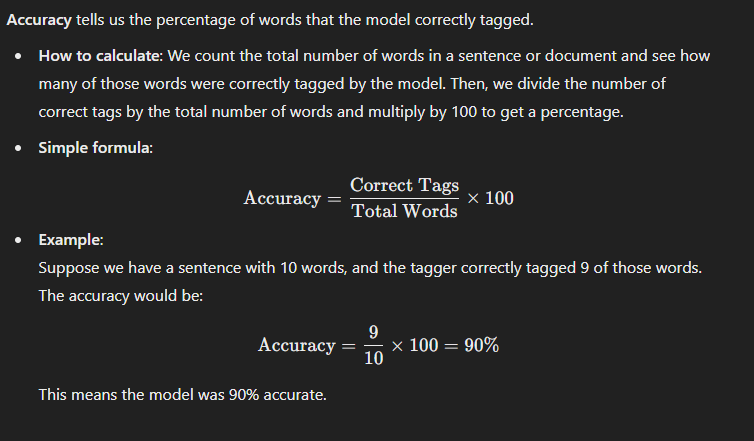


#### **b) Precision, Recall, and F1-Score (for Specific Tagging Tasks)**

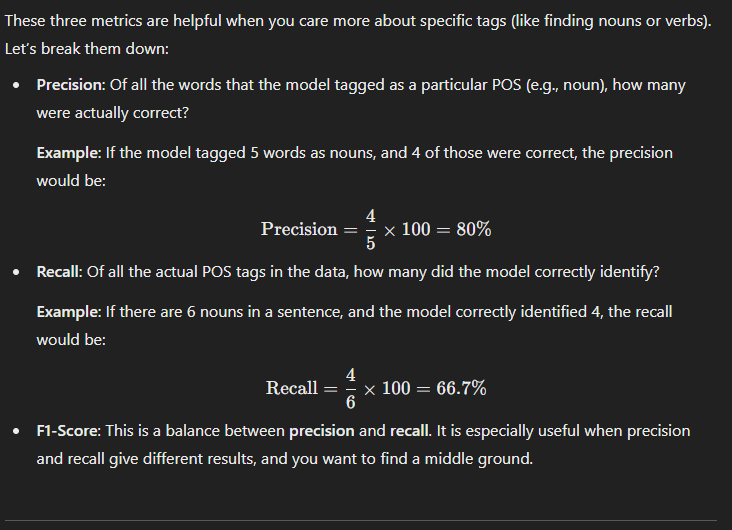


#### **c) Confusion Matrix**
- A **confusion matrix** is another useful tool that shows how often words are misclassified. It provides insight into which tags the model frequently confuses (e.g., nouns misclassified as verbs or vice versa).
- **Example**: If a model consistently tags verbs as nouns, this issue would show up clearly in a confusion matrix, allowing researchers to further refine the model.




##### Structure of Confuction Matrix

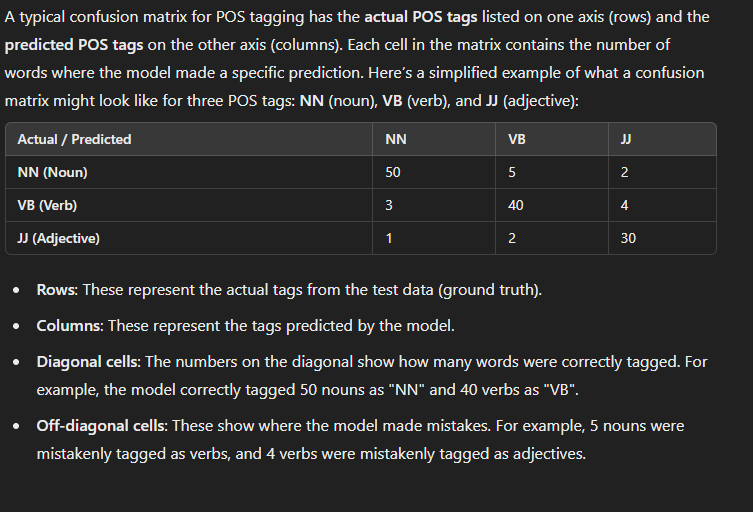

##### Interpreting the Confusion Matrix


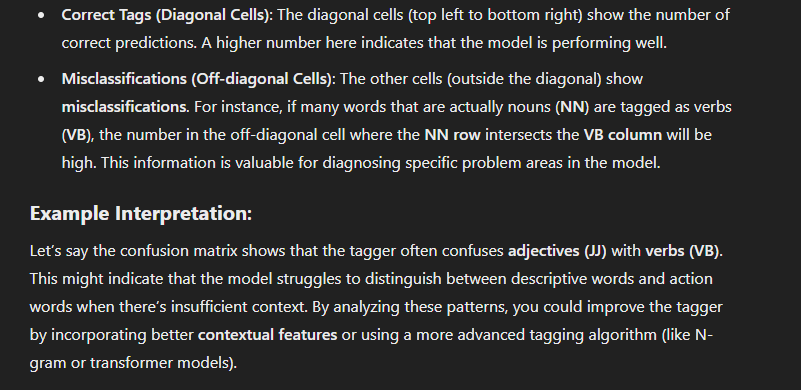

### 2. Evaluating different POS taggers

##### 1. Default Tagger


In [25]:
import nltk
from nltk.corpus import brown
from nltk import DefaultTagger
from nltk import accuracy
from nltk.metrics import precision, recall, f_measure
from collections import defaultdict

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Split the corpus into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(brown_tagged_sents))
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# Define the Default Tagger (assigns the tag "NN" to all words)
default_tagger = DefaultTagger('NN')

# Evaluate the tagger on the test data
test_tagged_words = [word for sent in test_sents for word in sent]
test_words = [word for word, tag in test_tagged_words]

# Use the Default Tagger to tag the test words
tagged_words = default_tagger.tag([word for word, tag in test_tagged_words])

# Convert tagged words to gold-standard tags for evaluation
gold_tags = [tag for word, tag in test_tagged_words]
predicted_tags = [tag for word, tag in tagged_words]

# Calculate accuracy
accuracy_score = accuracy(test_tagged_words, tagged_words)
print(f"Accuracy: {accuracy_score:.4f}")

# Create sets for precision, recall, and f-measure calculation
gold_tagged = defaultdict(set)
predicted_tagged = defaultdict(set)

for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
    gold_tagged[gold].add(i)
    predicted_tagged[pred].add(i)

# Evaluate for "NN" (as it is the default tag)
tag = 'NN'
precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

print(f"Precision (NN): {precision_score:.4f}")
print(f"Recall (NN): {recall_score:.4f}")
print(f"F1-Score (NN): {f1_score:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.1263
Precision (NN): 0.1263
Recall (NN): 1.0000
F1-Score (NN): 0.2242


##### 2. Regular Expression Tagger


In [31]:
import nltk
from nltk import RegexpTagger
from nltk.corpus import brown
from nltk.metrics import accuracy, precision, recall, f_measure
from collections import defaultdict

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Split the corpus into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(brown_tagged_sents))
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# Define the Regex Tagger with simple patterns
patterns = [
    (r'.*ing$', 'VBG'),   # Gerunds (words ending in 'ing')
    (r'.*ed$', 'VBD'),    # Simple past (words ending in 'ed')
    (r'.*es$', 'VBZ'),    # 3rd person singular present (words ending in 'es')
    (r'.*\'s$', 'POS'),   # Possessive (words ending in "'s")
    (r'.*s$', 'NNS'),     # Plural nouns (words ending in 's')
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),   # Numbers (digits)
    (r'.*', 'NN')         # Default to Noun (NN) for anything else
]

# Create a Regex Tagger using the patterns defined above
regex_tagger = RegexpTagger(patterns)

# Flatten test sentences for word-level tagging
test_tagged_words = [word for sent in test_sents for word in sent]
test_words = [word for word, tag in test_tagged_words]

# Tag the test words using the Regex Tagger
tagged_words = regex_tagger.tag([word for word, tag in test_tagged_words])

# Extract gold-standard tags for evaluation
gold_tags = [tag for word, tag in test_tagged_words]
predicted_tags = [tag for word, tag in tagged_words]

# Calculate accuracy
accuracy_score = accuracy(test_tagged_words, tagged_words)
print(f"Accuracy: {accuracy_score:.4f}")

# Create sets for precision, recall, and F1-score calculation
gold_tagged = defaultdict(set)
predicted_tagged = defaultdict(set)

for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
    gold_tagged[gold].add(i)
    predicted_tagged[pred].add(i)

# Evaluate for 'NN' (noun) as an example
tag = 'NN'
precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

print(f"Precision (NN): {precision_score:.4f}")
print(f"Recall (NN): {recall_score:.4f}")
print(f"F1-Score (NN): {f1_score:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.2010
Precision (NN): 0.1469
Recall (NN): 0.9463
F1-Score (NN): 0.2543


##### 3. Unigram Tagger


In [32]:
import nltk
from nltk.corpus import brown
from nltk import UnigramTagger
from nltk import accuracy
from nltk.metrics import precision, recall, f_measure
from collections import defaultdict

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Split the corpus into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(brown_tagged_sents))
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# Define the Unigram Tagger (train on the training sentences)
unigram_tagger = UnigramTagger(train_sents)

# Evaluate the tagger on the test data
test_tagged_words = [word for sent in test_sents for word in sent]
test_words = [word for word, tag in test_tagged_words]

# Use the Unigram Tagger to tag the test words
tagged_words = unigram_tagger.tag([word for word, tag in test_tagged_words])

# Convert tagged words to gold-standard tags for evaluation
gold_tags = [tag for word, tag in test_tagged_words]
predicted_tags = [tag for word, tag in tagged_words]

# Calculate accuracy
accuracy_score = accuracy(test_tagged_words, tagged_words)
print(f"Accuracy: {accuracy_score:.4f}")

# Create sets for precision, recall, and f-measure calculation
gold_tagged = defaultdict(set)
predicted_tagged = defaultdict(set)

for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
    gold_tagged[gold].add(i)
    predicted_tagged[pred].add(i)

# Evaluate for "NN" (as an example)
tag = 'NN'
precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

print(f"Precision (NN): {precision_score:.4f}")
print(f"Recall (NN): {recall_score:.4f}")
print(f"F1-Score (NN): {f1_score:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.8121
Precision (NN): 0.9399
Recall (NN): 0.7530
F1-Score (NN): 0.8361


##### 4. Lookup Tagger


In [33]:
import nltk
from nltk.corpus import brown
from nltk import UnigramTagger, accuracy
from nltk.metrics import precision, recall, f_measure
from collections import defaultdict

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Split the corpus into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(brown_tagged_sents))
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# Create a Lookup (Unigram) Tagger
# This tagger assigns the most frequent tag for each word based on the training set
lookup_tagger = UnigramTagger(train_sents)

# Evaluate the tagger on the test data
test_tagged_words = [word for sent in test_sents for word in sent]
test_words = [word for word, tag in test_tagged_words]

# Use the Lookup Tagger to tag the test words
tagged_words = lookup_tagger.tag([word for word, tag in test_tagged_words])

# Convert tagged words to gold-standard tags for evaluation
gold_tags = [tag for word, tag in test_tagged_words]
predicted_tags = [tag for word, tag in tagged_words]

# Calculate accuracy
accuracy_score = accuracy(test_tagged_words, tagged_words)
print(f"Accuracy: {accuracy_score:.4f}")

# Create sets for precision, recall, and f-measure calculation
gold_tagged = defaultdict(set)
predicted_tagged = defaultdict(set)

for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
    gold_tagged[gold].add(i)
    predicted_tagged[pred].add(i)

# Evaluate for "NN" (the most common noun tag) as an example
tag = 'NN'
precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

print(f"Precision (NN): {precision_score:.4f}")
print(f"Recall (NN): {recall_score:.4f}")
print(f"F1-Score (NN): {f1_score:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.8121
Precision (NN): 0.9399
Recall (NN): 0.7530
F1-Score (NN): 0.8361


##### 5. Bigram Tagger


In [34]:
import nltk
from nltk.corpus import brown
from nltk import BigramTagger, UnigramTagger
from nltk.metrics import accuracy
from nltk.metrics import precision, recall, f_measure
from collections import defaultdict

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Split the corpus into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(brown_tagged_sents))
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# Define a Unigram tagger as the backoff model for the Bigram tagger
unigram_tagger = UnigramTagger(train_sents)

# Define the Bigram Tagger using the Unigram Tagger for backoff
bigram_tagger = BigramTagger(train_sents, backoff=unigram_tagger)

# Evaluate the tagger on the test data
test_tagged_words = [word for sent in test_sents for word in sent]
test_words = [word for word, tag in test_tagged_words]

# Use the Bigram Tagger to tag the test words
tagged_words = [tag for word, tag in bigram_tagger.tag([word for word, tag in test_tagged_words])]

# Convert tagged words to gold-standard tags for evaluation
gold_tags = [tag for word, tag in test_tagged_words]
predicted_tags = tagged_words

# Calculate accuracy
accuracy_score = accuracy(test_tagged_words, bigram_tagger.tag(test_words))
print(f"Accuracy: {accuracy_score:.4f}")

# Create sets for precision, recall, and f-measure calculation
gold_tagged = defaultdict(set)
predicted_tagged = defaultdict(set)

for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
    gold_tagged[gold].add(i)
    predicted_tagged[pred].add(i)

# Evaluate for "NN" tag as an example (noun)
tag = 'NN'
precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

print(f"Precision (NN): {precision_score:.4f}")
print(f"Recall (NN): {recall_score:.4f}")
print(f"F1-Score (NN): {f1_score:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.8209
Precision (NN): 0.9461
Recall (NN): 0.7616
F1-Score (NN): 0.8439


##### 6. Trigram Tagger


In [35]:
import nltk
from nltk.corpus import brown
from nltk import TrigramTagger, UnigramTagger, BigramTagger, DefaultTagger
from nltk import accuracy
from nltk.metrics import precision, recall, f_measure
from collections import defaultdict

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Split the corpus into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(brown_tagged_sents))
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# Backoff Tagger: Default > Unigram > Bigram > Trigram Tagger
default_tagger = DefaultTagger('NN')  # Default to 'NN' (noun)
unigram_tagger = UnigramTagger(train_sents, backoff=default_tagger)
bigram_tagger = BigramTagger(train_sents, backoff=unigram_tagger)
trigram_tagger = TrigramTagger(train_sents, backoff=bigram_tagger)

# Tagging the test data
test_tagged_words = [word for sent in test_sents for word in sent]
test_words = [word for word, tag in test_tagged_words]
tagged_words = trigram_tagger.tag(test_words)

# Extract the true tags and predicted tags
gold_tags = [tag for word, tag in test_tagged_words]
predicted_tags = [tag for word, tag in tagged_words]

# Calculate accuracy
accuracy_score = accuracy(test_tagged_words, tagged_words)
print(f"Accuracy: {accuracy_score:.4f}")

# Create sets for precision, recall, and f-measure calculation
gold_tagged = defaultdict(set)
predicted_tagged = defaultdict(set)

for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
    gold_tagged[gold].add(i)
    predicted_tagged[pred].add(i)

# Evaluate for a specific tag, e.g., 'NN'
tag = 'NN'
precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

print(f"Precision (NN): {precision_score:.4f}")
print(f"Recall (NN): {recall_score:.4f}")
print(f"F1-Score (NN): {f1_score:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.8431
Precision (NN): 0.5562
Recall (NN): 0.9526
F1-Score (NN): 0.7024


##### 7. Full Backoff Tagger


In [36]:
import nltk
from nltk.corpus import brown
from nltk import UnigramTagger, BigramTagger, DefaultTagger
from nltk import accuracy
from nltk.metrics import precision, recall, f_measure
from collections import defaultdict

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Split the corpus into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(brown_tagged_sents))
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# Define the Full Backoff Tagger
# Step 1: Define a DefaultTagger with 'NN' as a fallback
default_tagger = DefaultTagger('NN')

# Step 2: Train a UnigramTagger, backed by the default tagger
unigram_tagger = UnigramTagger(train_sents, backoff=default_tagger)

# Step 3: Train a BigramTagger, backed by the UnigramTagger
bigram_tagger = BigramTagger(train_sents, backoff=unigram_tagger)

# Test the performance of the full backoff tagger on the test data
test_tagged_words = [word for sent in test_sents for word in sent]
test_words = [word for word, tag in test_tagged_words]

# Tagging the test words using the Bigram tagger (which has backoff to Unigram and Default taggers)
tagged_words = bigram_tagger.tag([word for word, tag in test_tagged_words])

# Convert tagged words to gold-standard tags for evaluation
gold_tags = [tag for word, tag in test_tagged_words]
predicted_tags = [tag for word, tag in tagged_words]

# Calculate accuracy
accuracy_score = accuracy(test_tagged_words, tagged_words)
print(f"Accuracy: {accuracy_score:.4f}")

# Create sets for precision, recall, and f-measure calculation
gold_tagged = defaultdict(set)
predicted_tagged = defaultdict(set)

for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
    gold_tagged[gold].add(i)
    predicted_tagged[pred].add(i)

# Evaluate for "NN" (noun), "VB" (verb), and "JJ" (adjective)
tags = ['NN', 'VB', 'JJ']
for tag in tags:
    precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
    recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
    f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

    print(f"\nTag: {tag}")
    print(f"Precision: {precision_score:.4f}")
    print(f"Recall: {recall_score:.4f}")
    print(f"F1-Score: {f1_score:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.8450

Tag: NN
Precision: 0.5565
Recall: 0.9519
F1-Score: 0.7024

Tag: VB
Precision: 0.9009
Recall: 0.7092
F1-Score: 0.7937

Tag: JJ
Precision: 0.8831
Recall: 0.6953
F1-Score: 0.7780


##### 8. Brill Tagger


In [37]:
import nltk
from nltk.corpus import brown
from nltk.tag import UnigramTagger, BrillTaggerTrainer
from nltk.tag.brill import brill24
from nltk import accuracy
from nltk.metrics import precision, recall, f_measure
from collections import defaultdict

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Split the corpus into training and testing data (90% train, 10% test)
train_size = int(0.9 * len(brown_tagged_sents))
train_sents = brown_tagged_sents[:train_size]
test_sents = brown_tagged_sents[train_size:]

# Train a Unigram Tagger as the initial tagger
unigram_tagger = UnigramTagger(train_sents)

# Define a Brill Tagger Trainer using the Unigram Tagger as the initial tagger
brill_template = brill24()  # Standard Brill templates
brill_trainer = BrillTaggerTrainer(initial_tagger=unigram_tagger, templates=brill_template, trace=3)

# Train the Brill tagger on the training data
brill_tagger = brill_trainer.train(train_sents, max_rules=100)

# Evaluate the Brill tagger on the test data
test_tagged_words = [word for sent in test_sents for word in sent]
test_words = [word for word, tag in test_tagged_words]

# Tag the test words using the Brill tagger
tagged_words = brill_tagger.tag([word for word, tag in test_tagged_words])

# Convert tagged words to gold-standard tags for evaluation
gold_tags = [tag for word, tag in test_tagged_words]
predicted_tags = [tag for word, tag in tagged_words]

# Calculate accuracy
accuracy_score = accuracy(test_tagged_words, tagged_words)
print(f"Accuracy: {accuracy_score:.4f}")

# Create sets for precision, recall, and f-measure calculation
gold_tagged = defaultdict(set)
predicted_tagged = defaultdict(set)

for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
    gold_tagged[gold].add(i)
    predicted_tagged[pred].add(i)

# Evaluate for a specific tag, such as "NN" (noun)
tag = 'NN'
precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

print(f"Precision (NN): {precision_score:.4f}")
print(f"Recall (NN): {recall_score:.4f}")
print(f"F1-Score (NN): {f1_score:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TBL train (fast) (seqs: 4160; tokens: 90521; tpls: 24; min score: 2; min acc: None)
Finding initial useful rules...
    Found 79389 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
 315 315   0   3  | TO->IN if Pos:AT@[1]
  93  93   0   3  | TO->IN if Pos:NP@[1]
  88 149  61   3  | NN->VB if Pos:TO@[-1]
  72 100  28   3  | VB->NN if Pos:AT@[-2,-1]
  65  68   3   0  | VBD->VBN if Pos:BEDZ@[-2,-1]
  61 105  44   1  | TO->IN if Pos:NNS@[1,2]
  56  56   0   2  | NN->VB if Pos:MD@[-1]
  56  56   0   0  | VBD->VBN if Pos:HVZ@[-3,-2,-1]
  54 127  73   4  | NP->NP-TL if Pos:NN-TL@[1]
  52  55   3   0  | VBN->VBD if Pos:NP@[-1]
  46  47   1   0 

### **2. Training and Test Data**

- For accurate evaluation, taggers are typically trained on one part of a dataset (the **training set**) and evaluated on a separate part (the **test set**).
- This ensures that the model is not simply memorizing the data but is learning to generalize.



#### **a) Cross-Validation**
In some cases, especially when working with smaller datasets, **cross-validation** is used to maximize the use of available data. The dataset is divided into several subsets (or "folds"), and the model is trained and tested multiple times, with a different fold serving as the test set each time.



##### Demonstration

In [39]:
import nltk
from nltk.corpus import brown
from nltk import DefaultTagger
from nltk import accuracy
from nltk.metrics import precision, recall, f_measure
from collections import defaultdict
from sklearn.model_selection import KFold

# Download necessary resources
nltk.download('brown')
nltk.download('punkt')

# Load the tagged Brown corpus (genre: news)
brown_tagged_sents = brown.tagged_sents(categories='news')

# Number of folds for cross-validation
n_splits = 5

# Initialize KFold from sklearn with 5 splits
kf = KFold(n_splits=n_splits)

# Initialize variables for overall metrics
overall_accuracy = 0
overall_precision = 0
overall_recall = 0
overall_f1 = 0

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(brown_tagged_sents):
    train_sents = [brown_tagged_sents[i] for i in train_index]
    test_sents = [brown_tagged_sents[i] for i in test_index]

    # Define the Default Tagger (assigns the tag "NN" to all words)
    default_tagger = DefaultTagger('NN')

    # Evaluate the tagger on the test data
    test_tagged_words = [word for sent in test_sents for word in sent]
    test_words = [word for word, tag in test_tagged_words]

    # Use the Default Tagger to tag the test words
    tagged_words = default_tagger.tag([word for word, tag in test_tagged_words])

    # Convert tagged words to gold-standard tags for evaluation
    gold_tags = [tag for word, tag in test_tagged_words]
    predicted_tags = [tag for word, tag in tagged_words]

    # Calculate accuracy for this fold
    accuracy_score = accuracy(test_tagged_words, tagged_words)
    overall_accuracy += accuracy_score

    # Create sets for precision, recall, and f-measure calculation
    gold_tagged = defaultdict(set)
    predicted_tagged = defaultdict(set)

    for i, (gold, pred) in enumerate(zip(gold_tags, predicted_tags)):
        gold_tagged[gold].add(i)
        predicted_tagged[pred].add(i)

    # Evaluate for "NN" (as it is the default tag)
    tag = 'NN'
    precision_score = precision(gold_tagged[tag], predicted_tagged[tag])
    recall_score = recall(gold_tagged[tag], predicted_tagged[tag])
    f1_score = f_measure(gold_tagged[tag], predicted_tagged[tag])

    # Accumulate precision, recall, and f1 for all folds
    overall_precision += precision_score
    overall_recall += recall_score
    overall_f1 += f1_score

# Print overall results averaged across all folds
print(f"Overall Accuracy: {overall_accuracy / n_splits:.4f}")
print(f"Overall Precision (NN): {overall_precision / n_splits:.4f}")
print(f"Overall Recall (NN): {overall_recall / n_splits:.4f}")
print(f"Overall F1-Score (NN): {overall_f1 / n_splits:.4f}")


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Overall Accuracy: 0.1309
Overall Precision (NN): 0.1309
Overall Recall (NN): 1.0000
Overall F1-Score (NN): 0.2313


##### Analysis of the above result

- with result obtained with Default Tagger above https://colab.research.google.com/drive/1juSPYZfoNoyW4uxJ484uXkj240gRsrUQ#scrollTo=-JGzgQ48IzRz&line=51&uniqifier=1


| **Metric**            | **Default Tagger** | **Default Tagger (with Cross-Validation)** |
|-----------------------|--------------------|-------------------------------------------|
| **Accuracy**          | 0.1263 (12.63%)    | 0.1309 (13.09%)                           |
| **Precision (NN)**    | 0.1263 (12.63%)    | 0.1309 (13.09%)                           |
| **Recall (NN)**       | 1.0000 (100%)      | 1.0000 (100%)                             |
| **F1-Score (NN)**     | 0.2242 (22.42%)    | 0.2313 (23.13%)                           |

##### **Key Observations**:

1. **Accuracy**:
   - Accuracy improves slightly from **12.63% to 13.09%** when using cross-validation. The minor improvement suggests that cross-validation helps the tagger generalize better over the different data splits.

2. **Precision (NN)**:
   - Precision increases slightly from **12.63% to 13.09%** with cross-validation. Precision measures how many of the predicted "NN" tags were correct, and this improvement indicates marginally better performance with cross-validation.

3. **Recall (NN)**:
   - Recall remains perfect at **100%** in both cases. This is expected because the **Default Tagger** labels all words as **NN (noun)**, ensuring that all actual nouns are tagged correctly.

4. **F1-Score (NN)**:
   - The **F1-Score** also shows a small improvement from **22.42% to 23.13%** when using cross-validation. The F1-score balances precision and recall, so the slight improvement here reflects the small increase in precision.

##### **Conclusion**:

The **Default Tagger** assigns the **"NN" (noun)** tag to all words, leading to high recall but low precision. While cross-validation results in a marginal improvement in accuracy, precision, and F1-score, the **Default Tagger** still underperforms for many non-noun parts of speech, indicating the need for more sophisticated taggers for accurate POS tagging. Cross-validation improves the model slightly by exposing it to different training/test splits, making the evaluation more reliable.

#### **b) Gold-Standard Corpora**
- The most reliable evaluations are performed using **gold-standard corpora**, which are manually tagged by experts.
- These corpora serve as a reference for the tagger's output, allowing for precise comparisons.
  
**Common Gold-Standard Corpora**:
- **Penn Treebank**: A large, manually tagged corpus with extensive annotations for POS tagging.
- **Brown Corpus**: An early tagged corpus used widely in NLP research.
- **Universal Dependencies**: A multilingual, annotated corpus for POS tagging and syntactic dependencies.

Using such corpora ensures consistency in evaluation and helps compare results across different studies.




### **3. Common Sources of Error**

Even advanced POS taggers encounter difficulties that reduce their performance. Evaluating these error patterns can provide insights into model limitations and ways to improve them.



#### **a) Ambiguity**
Words with multiple meanings or grammatical roles (e.g., "bank" as both a noun and a verb) are frequent sources of tagging errors. Many taggers struggle to correctly tag such words without sufficient context.



#### **b) Out-of-Vocabulary Words**
When a word is not seen in the training data, the tagger may misclassify it, especially if the word is rare or domain-specific. This is a common issue in corpora with specialized vocabulary (e.g., legal or medical texts).



#### **c) Complex Sentence Structures**
Longer or more syntactically complex sentences introduce tagging difficulties. Errors can propagate through sentences where the grammatical relationships between words are difficult to resolve, particularly in languages with rich morphology (e.g., German or Finnish).



#### **d) Tagging Errors in Training Data**
If there are errors in the tagged training data (which can occur even in gold-standard corpora), they will negatively affect the tagger’s ability to learn correct patterns.




### **4. Improving Tagger Performance**

Once the model’s weaknesses are identified during evaluation, several techniques can be used to improve the tagger’s performance.



#### **a) Backoff Taggers**
Backoff strategies, as discussed earlier, can help resolve errors by combining multiple taggers. For example, a **bigram tagger** may be more accurate for common word pairs, while a **unigram tagger** may serve as a fallback for rare words.



#### **b) Error-Driven Learning (Brill Tagger)**
The **Brill Tagger**, discussed in the previous section, applies transformation rules to systematically correct tagging mistakes. Evaluating these transformations helps fine-tune the model and improve its accuracy.



#### **c) Smoothing Techniques**
In N-gram taggers, **smoothing techniques** (such as **Laplace smoothing**) help address the issue of unseen word pairs. By assigning small probabilities to unseen events, smoothing prevents zero-probability errors that often arise in bigram or trigram models.



#### **d) Larger Training Data**
Tagger performance can often be significantly improved by using larger training datasets. The more diverse the dataset, the more likely the model is to generalize well to unseen text.




### **5. Benchmarks and Comparative Evaluation**

A- fter evaluating a tagger, its performance is often compared to existing benchmarks in the literature.
- For example, the performance of a POS tagger might be compared to benchmarks established by taggers trained on the **Penn Treebank** corpus.
- Such comparisons help gauge the progress in NLP and establish the efficiency of new models.

Some benchmarks in POS tagging:
- **Tagging accuracy on the Penn Treebank**: Advanced taggers often achieve between 95% and 97% accuracy.
- **State-of-the-art models** (like **BERT**, **ELMo**) typically perform better due to their ability to capture contextual embeddings.


